### Types of Probability Distributions
#### Normal Distributions

A random variable $X$ which follows a normal distribution with mean $\mu$ and standard deviation $\sigma$ and has this density function: 
<h3 align="center">
    <font size="4">
        $ X = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{1}{2}(\frac{x-\mu}{\sigma})^2} $
    </font>
    </h3> 
    
If one knew the mean and standard deviation of a particular distribution, it would be possible to estimate the probability of drawing a value from a particular range - e.g., $a \leq X \leq b$ - by taking the definite integral of this function: 
<h3 align="center">
    <font size="4">
        $\int_{a}^{b}\frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{1}{2}(\frac{x-\mu}{\sigma})^2}dx$.
    </font>
</h3>

#### Standard Normal Distribution

The standardized normal distribution is the most important member of the family of normal probability distributions—the one with $\mu = 0$  and $\sigma = 1$. The normal random variable distributed according to the standard normal distribution is called the standard normal variable and is denoted by $Z$. It represents the number of standard deviations a given point X lies from the mean of the standard normal distribution.  It is expressed as
<h3 align="center">
    <font size="4">
        $ Z =  \frac{X-\mu}{\sigma}$
    </h3> 


In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
from stats import *

# np.linespace(a,b,ndiv) create a line from a to b with the
## number of divisions ndiv
def normal_dist(mean, sd, x = np.linspace(-10,10,1000)):
    prob_density = 1 / (sd * (2 * np.pi) ** .5) * np.exp(-0.5*((x-mean)/sd)**2)
    return prob_density
mean = 0
sd = 1
x = np.linspace(-10,10,1000)
y = normal_dist(mean, sd, x = x)
y

array([7.69459863e-23, 9.39820210e-23, 1.14743878e-22, 1.40036163e-22,
       1.70834985e-22, 2.08324026e-22, 2.53938085e-22, 3.09415635e-22,
       3.76862222e-22, 4.58826917e-22, 5.58394466e-22, 6.79296313e-22,
       8.26044309e-22, 1.00409167e-21, 1.22002665e-21, 1.48180552e-21,
       1.79903259e-21, 2.18329685e-21, 2.64857624e-21, 3.21172317e-21,
       3.89304716e-21, 4.71701394e-21, 5.71308372e-21, 6.91671611e-21,
       8.37057415e-21, 1.01259663e-20, 1.22445730e-20, 1.48005122e-20,
       1.78828107e-20, 2.15983586e-20, 2.60754403e-20, 3.14679525e-20,
       3.79604417e-20, 4.57741157e-20, 5.51740168e-20, 6.64775762e-20,
       8.00648113e-20, 9.63904764e-20, 1.15998535e-19, 1.39539388e-19,
       1.67790381e-19, 2.01680189e-19, 2.42317820e-19, 2.91027079e-19,
       3.49387515e-19, 4.19283043e-19, 5.02959655e-19, 6.03093898e-19,
       7.22874081e-19, 8.66096546e-19, 1.03727974e-18, 1.24179931e-18,
       1.48604812e-18, 1.77762546e-18, 2.12556107e-18, 2.54057983e-18,
      

In [2]:
norm_df = pd.DataFrame([x,y], index = ["x", "y"]).T
norm_df = norm_df.set_index("x")
norm_df.loc[-.05:0.05]

,y
x,
-0.03003,0.398762
-0.01001,0.398922
0.01001,0.398922
0.03003,0.398762


<Axes: xlabel='x'>

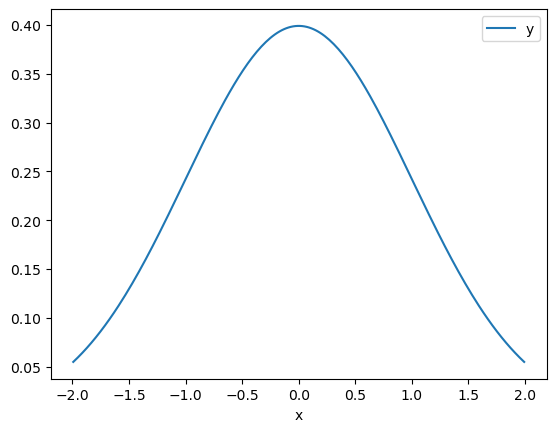

In [3]:
norm_df.loc[-2:2].plot()

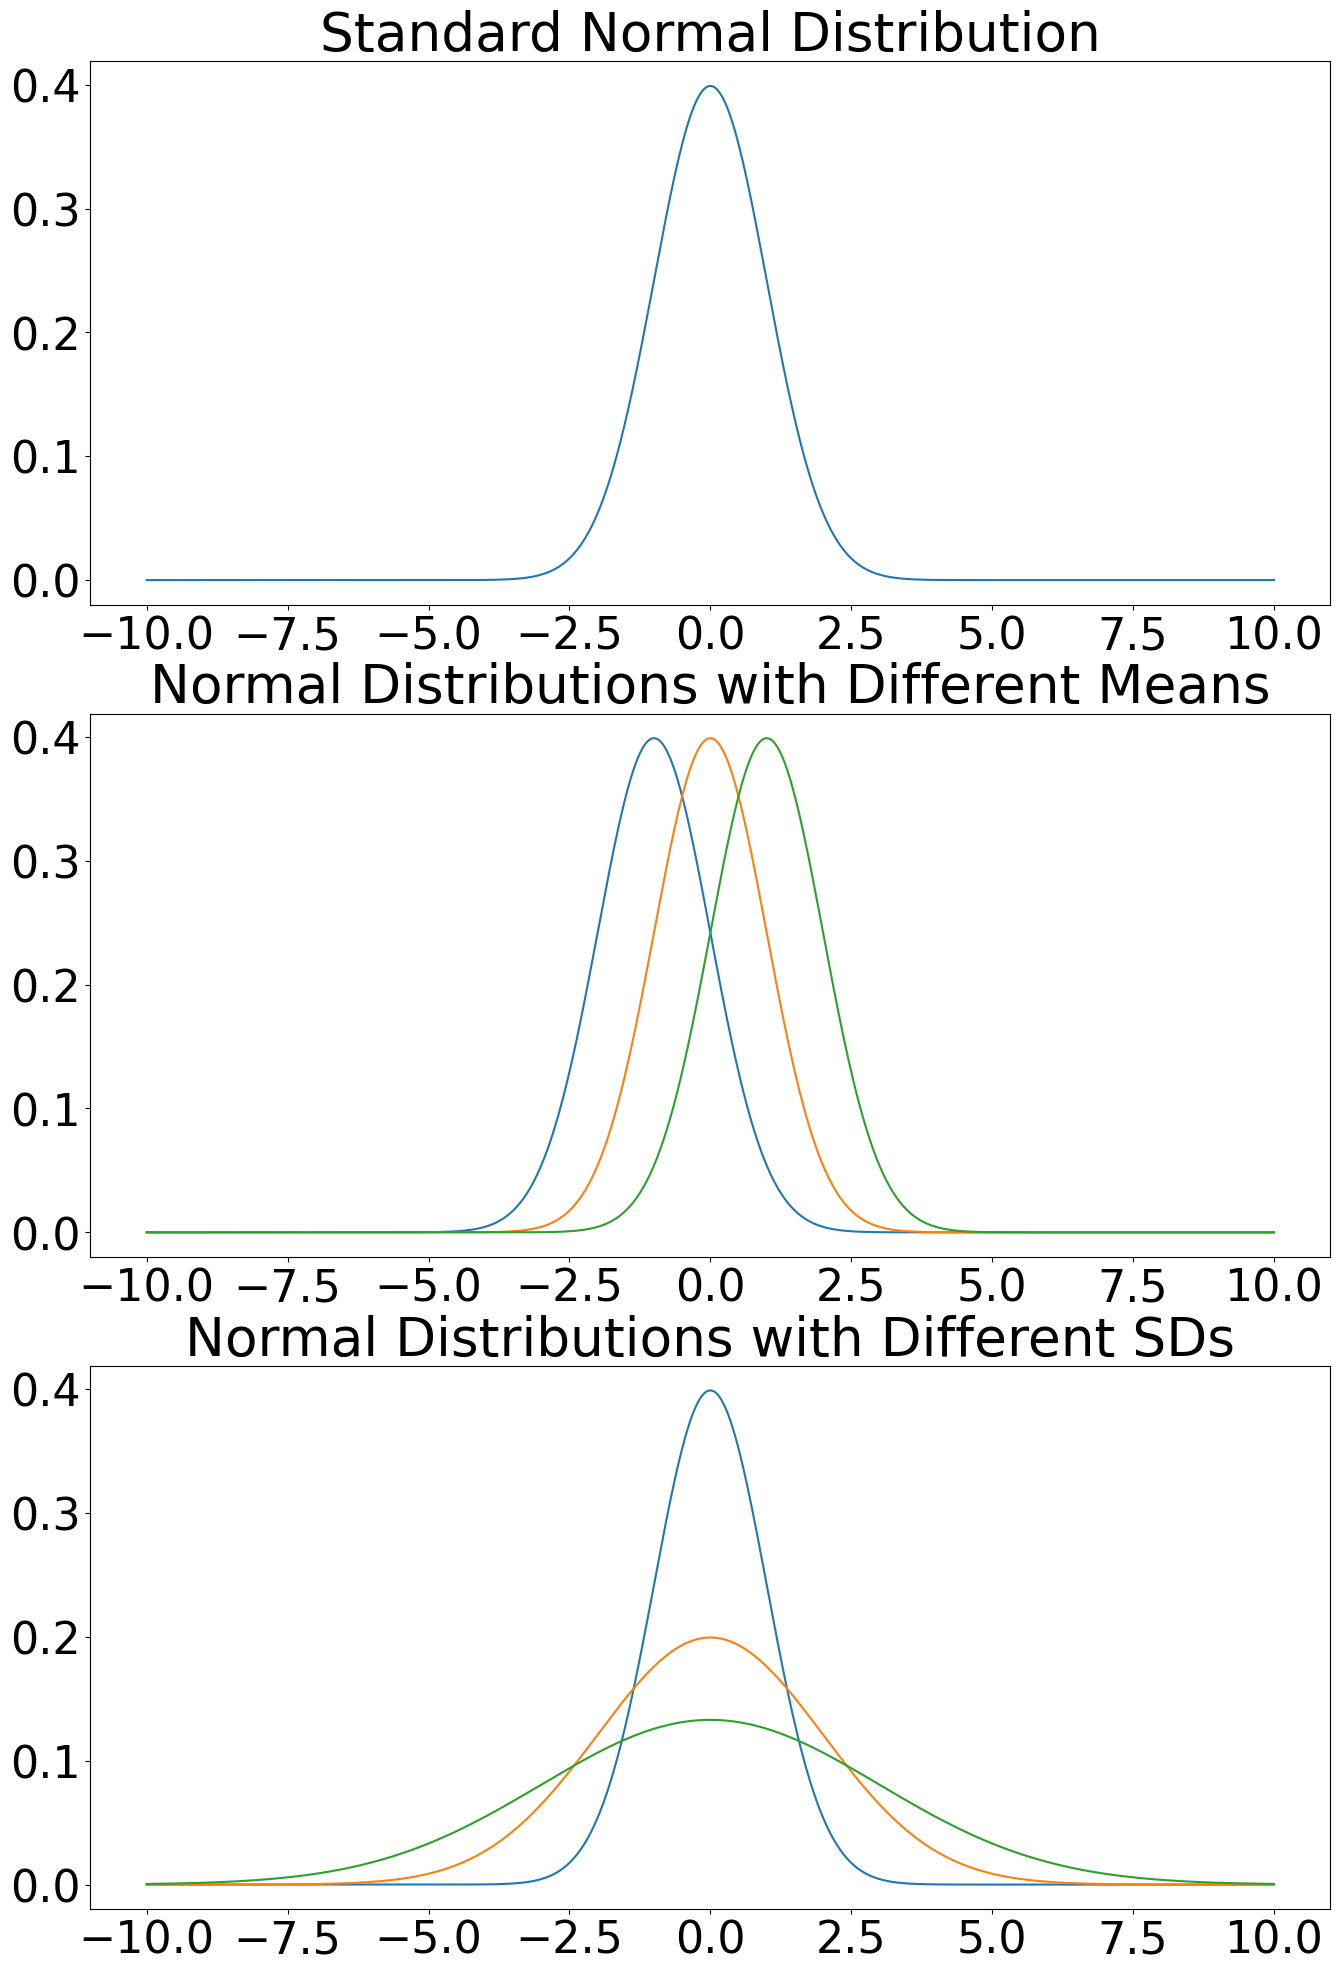

In [4]:
plt.rcParams.update({'font.size': 32})

# create a multiplot that has 3 stacked visualization
## axs will have indices 0,1,2
fig, axs = plt.subplots(3,1, figsize = (16,24))
normal_dist_list = normal_dist(mean = 0, sd = 1)
## in plot 0, only create a standard normal distribution with mean=0, sd = 1
axs[0].plot(x, normal_dist_list)
axs[0].set_title("Standard Normal Distribution")

# in plot 1, create 3 distributions with means of -1,0,1 and sd = 1
for mean_ in range(-1,1+1,1):
    normal_dist_list = normal_dist(mean = mean_, sd = 1)
    axs[1].plot(x, normal_dist_list, label = "Normal Distribution")
    axs[1].set_title("Normal Distributions with Different Means")
    
# in plot 2, create 3 distribution with mean = 0 and sds of 1,2,3
for sd_ in range(1,3+1):
    normal_dist_list = normal_dist(mean = 0, sd = sd_)
    axs[2].plot(x, normal_dist_list, label = "Normal Distribution")
    axs[2].set_title("Normal Distributions with Different SDs")

## Lognormal Distribution

The probability density function of the distribution is:
<h3 align="center">
    <font size="4">
        $f(x) = \frac{1}{x\sigma\sqrt{2\pi}}e^{\frac{- (lnx-\mu)^2}{2\sigma^2}}$
    </font>
    </h3> 



C:\Users\JLCat\AppData\Local\Temp\ipykernel_11444\2019411194.py:2: RuntimeWarning: divide by zero encountered in divide
  prob_density = (1 / x * sd * np.sqrt(2*math.pi))*math.e**(
C:\Users\JLCat\AppData\Local\Temp\ipykernel_11444\2019411194.py:3: RuntimeWarning: divide by zero encountered in log
  -(np.log(x) - mean)**2 / (2*sd**2))
C:\Users\JLCat\AppData\Local\Temp\ipykernel_11444\2019411194.py:2: RuntimeWarning: invalid value encountered in multiply
  prob_density = (1 / x * sd * np.sqrt(2*math.pi))*math.e**(


Text(0.5, 1.0, 'Log Normal Distribution with Logged x-axis')

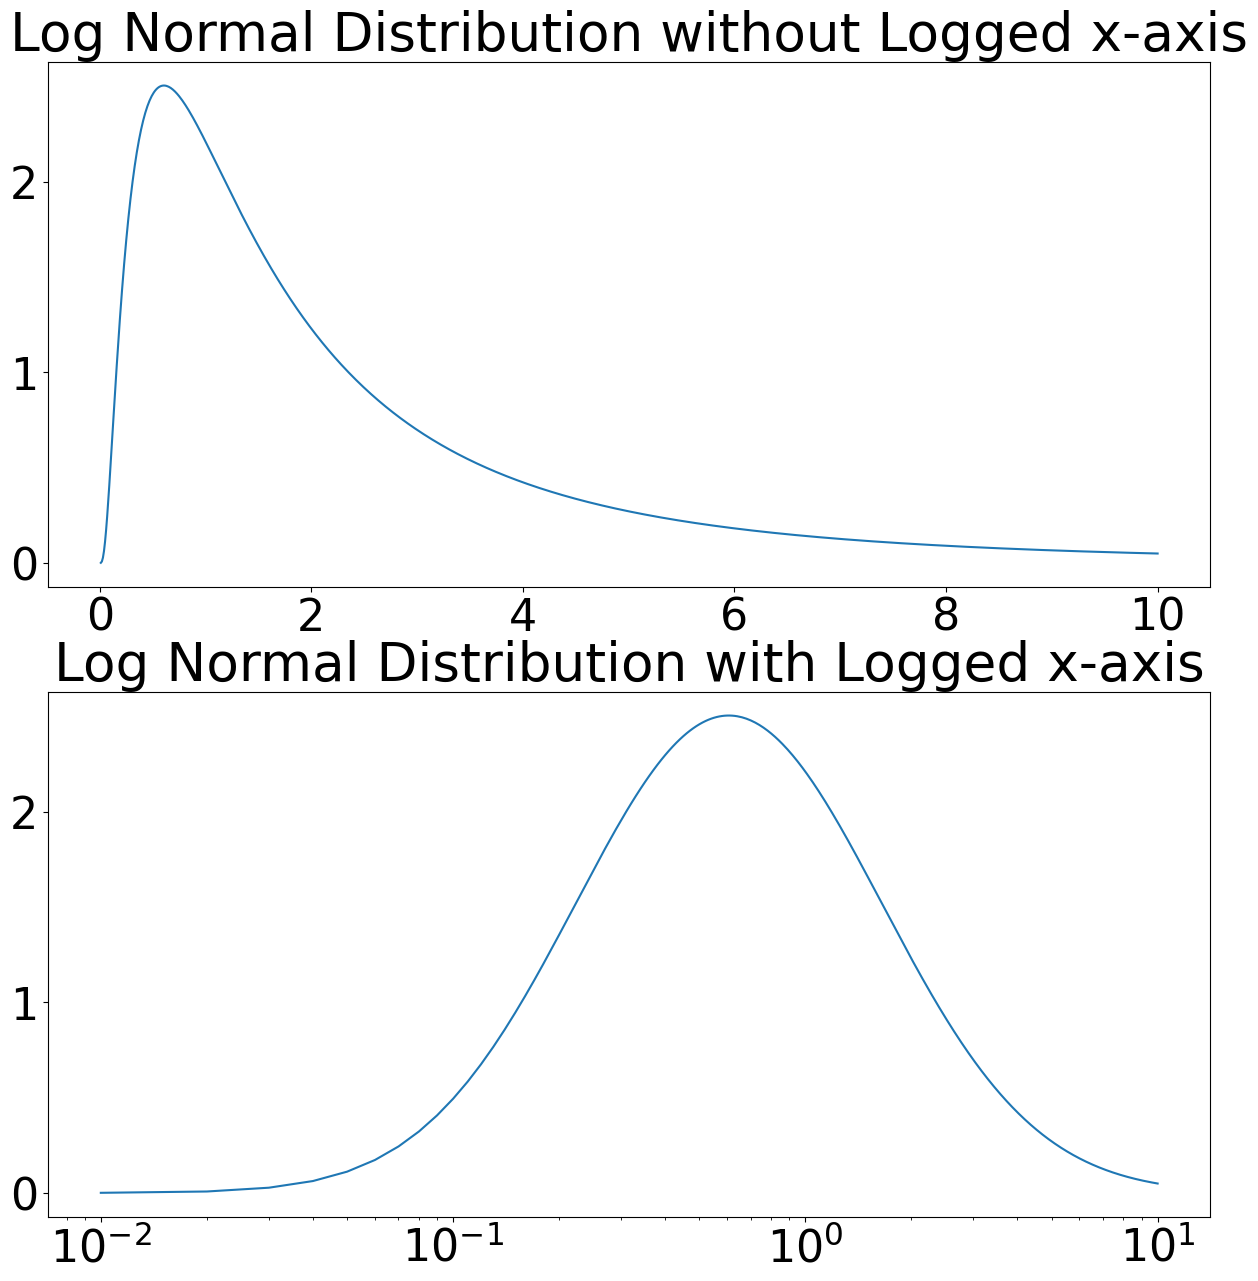

In [5]:
def create_lognormal(mean, sd, x = np.linspace(0, 10, 1000)):
    prob_density = (1 / x * sd * np.sqrt(2*math.pi))*math.e**(
        -(np.log(x) - mean)**2 / (2*sd**2))
    return prob_density
# start linspace from 0; log(0) will be a null value, but the next value
## will not be null
x = np.linspace(0,10,1000)
mean = .5
lognorm = create_lognormal(mean,1,x)
fig, axs = plt.subplots(2,1, figsize = (15,15))
axs[0].plot(x, lognorm)
axs[0].set_title("Log Normal Distribution without Logged x-axis")
axs[1].plot(x, lognorm)
axs[1].set_xscale("log")
axs[1].set_title("Log Normal Distribution with Logged x-axis")

In [6]:
import pandas as pd
import pandas_datareader.data as web
import yfinance as yf
import datetime


yf.pdr_override()
start = datetime.datetime(2012, 1, 1)
end = datetime.datetime.today()

data_dict = {}
stocks = ["MSFT", "AAPL", "PG", "TSLA"]
for key in stocks:
    data_dict[key] = web.get_data_yahoo(key, start, end)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [7]:
data_dict["AAPL"]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.433825,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.500648,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.639426,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.771559,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.751298,394024400
...,...,...,...,...,...,...
2024-02-13,185.770004,186.210007,183.509995,185.039993,185.039993,56529500
2024-02-14,185.320007,185.529999,182.440002,184.149994,184.149994,54630500
2024-02-15,183.550003,184.490005,181.350006,183.860001,183.860001,65434500


In [8]:
[val["Close"] for val in data_dict.values()]

[Date
 2012-01-03     26.770000
 2012-01-04     27.400000
 2012-01-05     27.680000
 2012-01-06     28.110001
 2012-01-09     27.740000
                  ...    
 2024-02-13    406.320007
 2024-02-14    409.489990
 2024-02-15    406.559998
 2024-02-16    404.059998
 2024-02-20    402.790009
 Name: Close, Length: 3052, dtype: float64,
 Date
 2012-01-03     14.686786
 2012-01-04     14.765714
 2012-01-05     14.929643
 2012-01-06     15.085714
 2012-01-09     15.061786
                  ...    
 2024-02-13    185.039993
 2024-02-14    184.149994
 2024-02-15    183.860001
 2024-02-16    182.309998
 2024-02-20    181.559998
 Name: Close, Length: 3052, dtype: float64,
 Date
 2012-01-03     66.830002
 2012-01-04     66.800003
 2012-01-05     66.519997
 2012-01-06     66.360001
 2012-01-09     66.639999
                  ...    
 2024-02-13    156.270004
 2024-02-14    155.630005
 2024-02-15    157.009995
 2024-02-16    157.509995
 2024-02-20    158.509995
 Name: Close, Length: 3052, dtype: f

In [9]:
# pd.concatenate will join a list of series values either vertically (axis = 0)
## or join them horizontally (axis = 1)
close_data = pd.concat([val["Close"] for val in data_dict.values()],
                       # keys dictionary should be in the same order as each
                       ## relevant "Close" series
                      keys = data_dict.keys(),
                      axis = 1)
close_data

,MSFT,AAPL,PG,TSLA
Date,,,,
2012-01-03,26.770000,14.686786,66.830002,1.872000
2012-01-04,27.400000,14.765714,66.800003,1.847333
2012-01-05,27.680000,14.929643,66.519997,1.808000
2012-01-06,28.110001,15.085714,66.360001,1.794000
2012-01-09,27.740000,15.061786,66.639999,1.816667
...,...,...,...,...
2024-02-13,406.320007,185.039993,156.270004,184.020004
2024-02-14,409.489990,184.149994,155.630005,188.710007
2024-02-15,406.559998,183.860001,157.009995,200.449997


Text(0.5, 1.0, 'Daily Stock Prices')

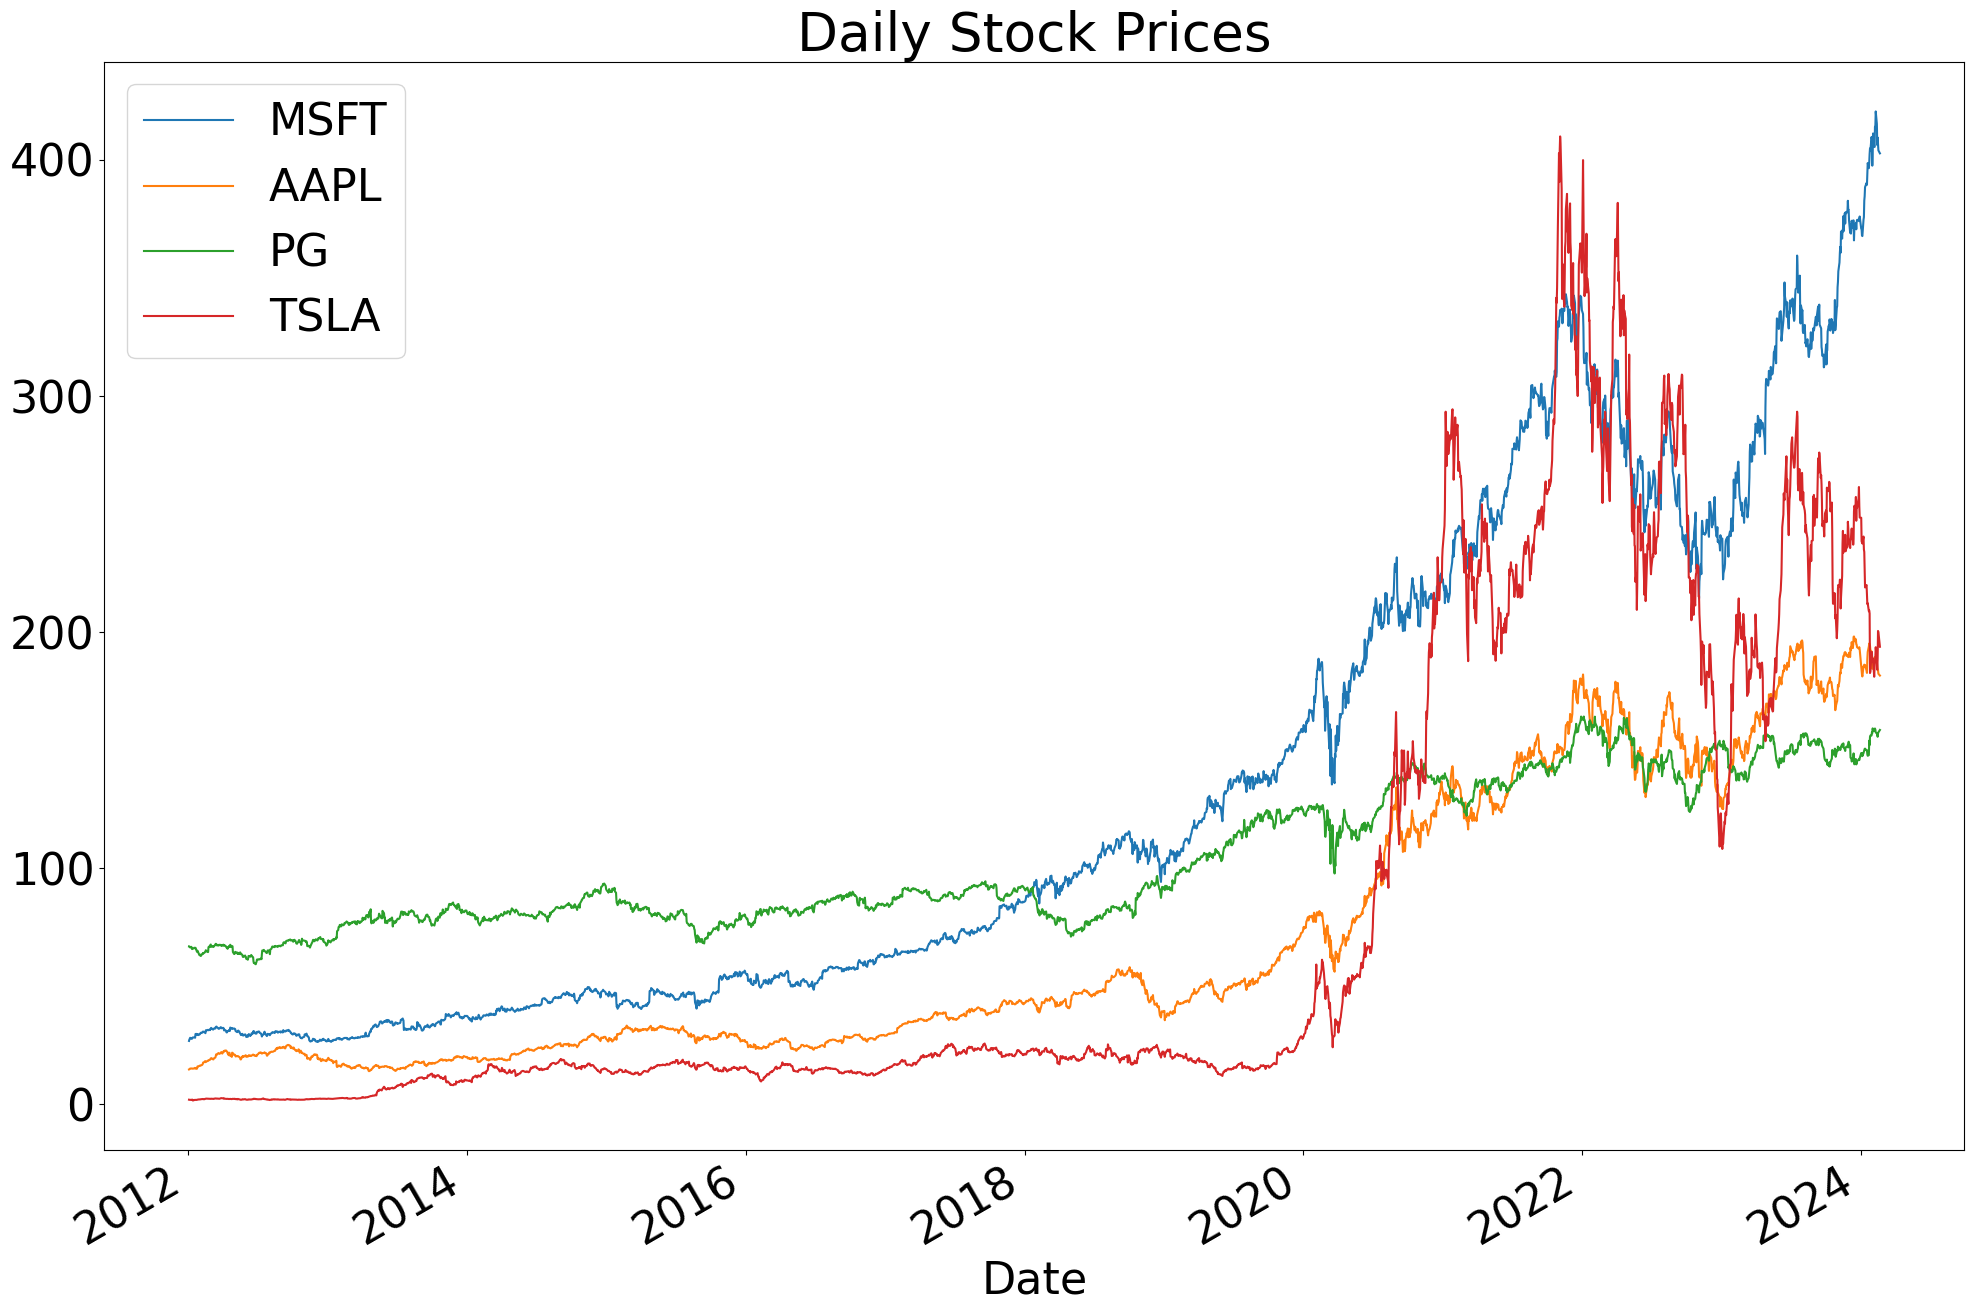

In [10]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 32})
fig, ax = plt.subplots(figsize = (24,16))
close_data.plot.line(legend=True, ax  =ax)
ax.set_title("Daily Stock Prices")

## Logging data helps compare relative changes

C:\Users\JLCat\AppData\Local\Temp\ipykernel_11444\2778751477.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([int(y) for y in y_vals])


[Text(0, 0.1, '0'),
 Text(0, 1.0, '1'),
 Text(0, 10.0, '10'),
 Text(0, 100.0, '100'),
 Text(0, 1000.0, '1000'),
 Text(0, 10000.0, '10000')]

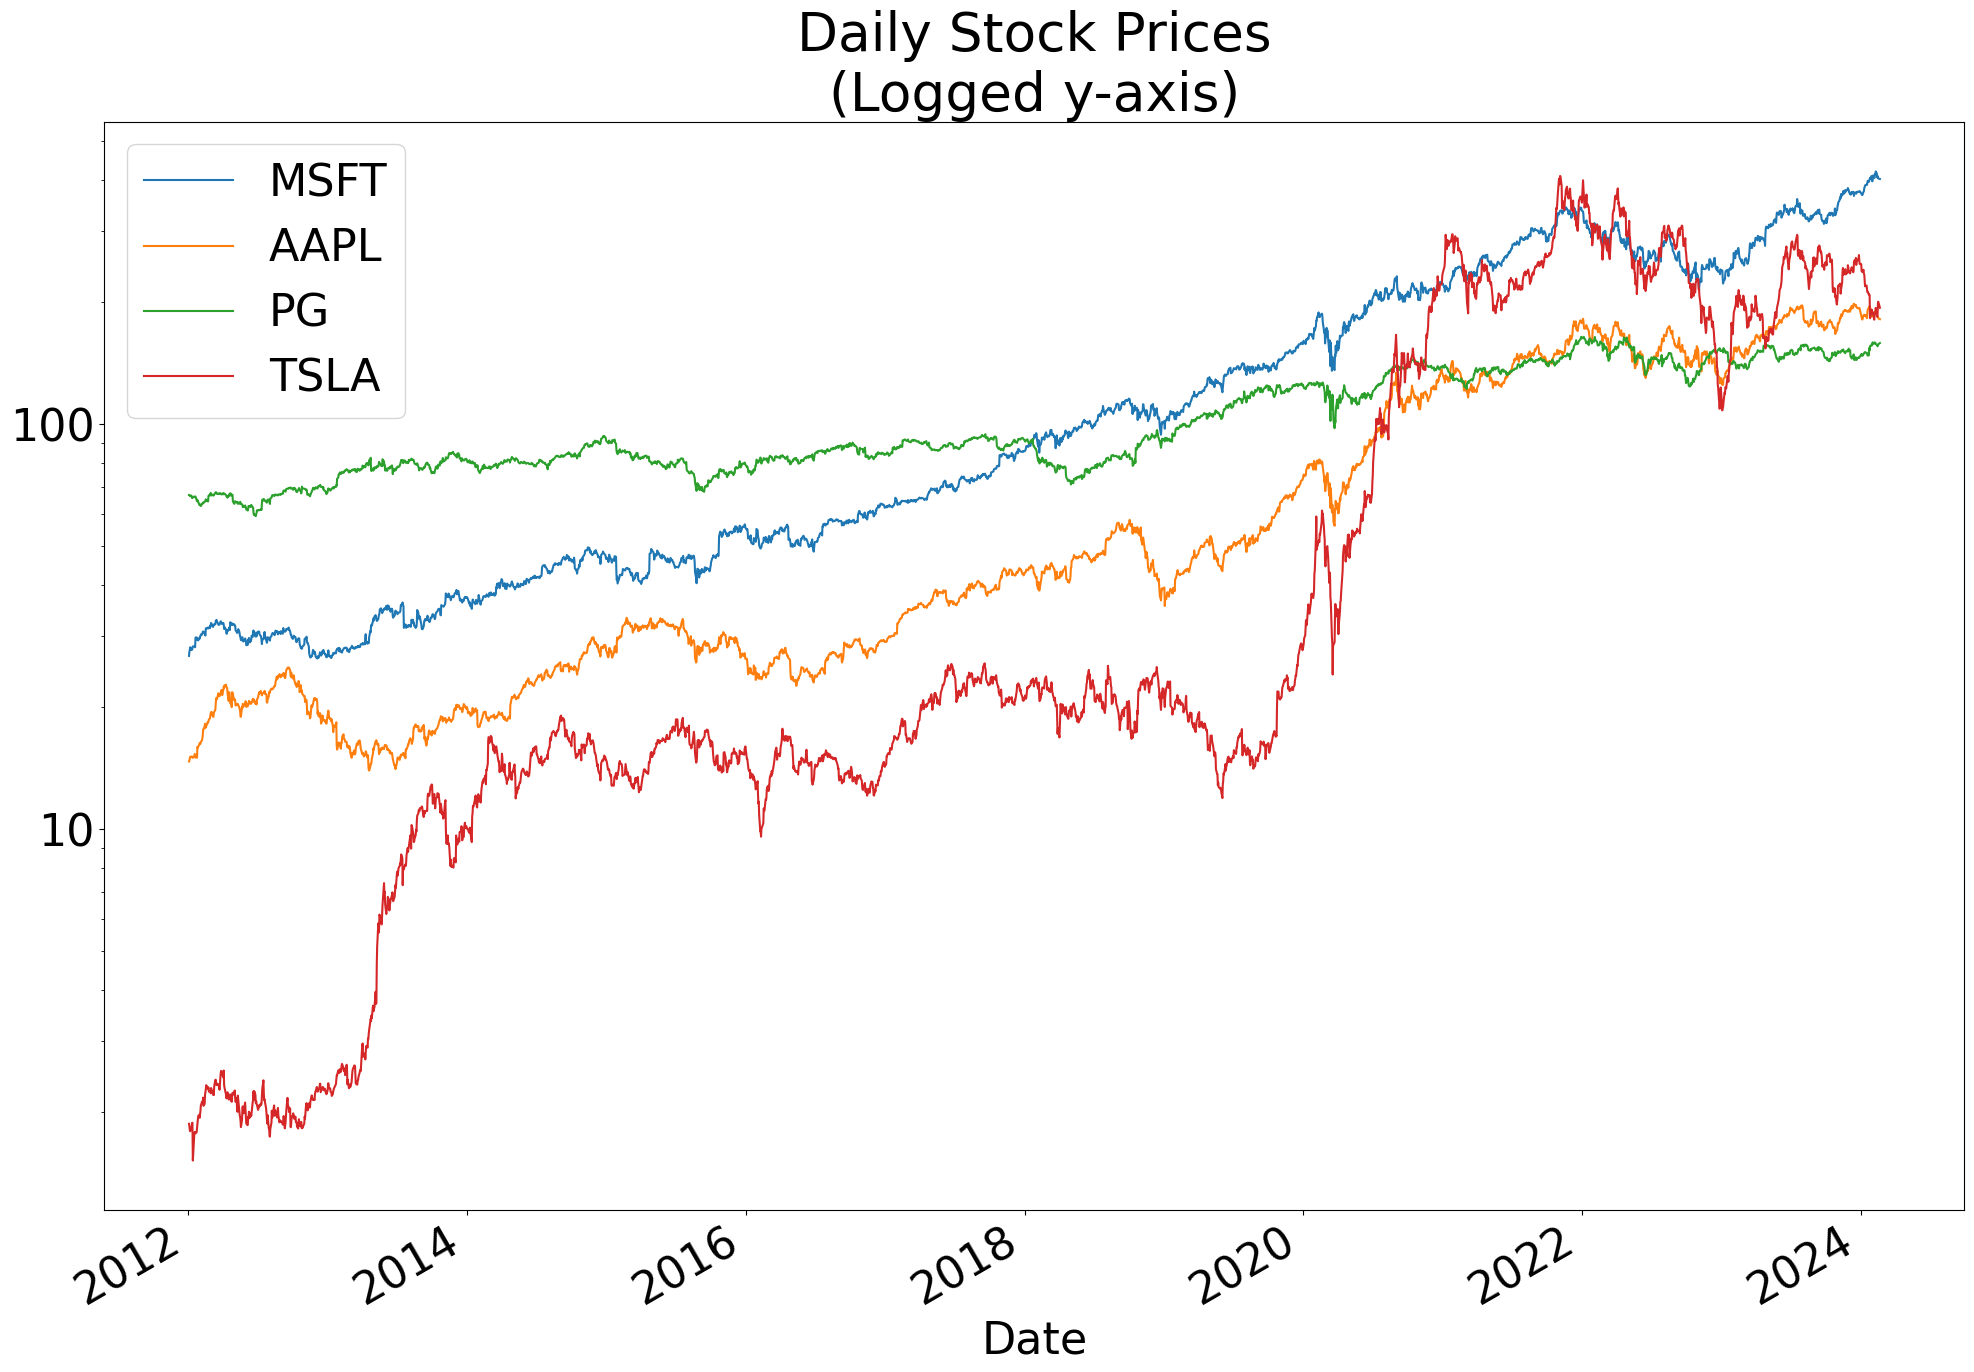

In [11]:
fig, ax = plt.subplots(figsize = (24,16))
close_data.plot.line(legend=True, ax  =ax)
ax.set_title("Daily Stock Prices\n(Logged y-axis)")
ax.set_yscale("log")
# reset y labels to integer from scientific
#access values form the yaxis
y_vals = ax.get_yticks()
# use generator to transform each y value into an integer
ax.set_yticklabels([int(y) for y in y_vals])